# Computational Mathematics
## Lecture 2

### Errors of polynomial interpolation

We choose some points on $[-1,1]$.

$-1=x_0<x_1<\cdots<x_5=1$, $x_{i1} := [x_0 , \cdots , x_5]^{\top}$

In [15]:
n=6;
xi1 = [-1; 2*rand(n-2).-1; 1]

6-element Array{Float64,1}:
 -1.0               
  0.0977964692811728
  0.1035145900993033
  0.7707158893961119
  0.5538683374663029
  1.0               

Construct $p_1(x)=(x-x_0)(x-x_1)\cdots(x-x_5)$. Define $Error = \max_{x\in [-1,1]}p_1(x)$. Plot $|p_1(x)|$.

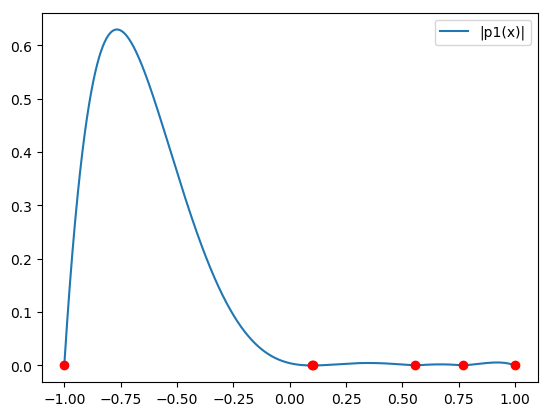

Error=0.6295320984864571


In [16]:
x = range(-1,stop=1,length=1000);
p1 = x.-xi1[1];
for ii=1:n-1
    p1 = p1.*(x.-xi1[ii+1]);
end
println("Error=",maximum(abs.(p1)))
using PyPlot
plot(x, abs.(p1),label="|p1(x)|");
plot(xi1, zeros(n,1), "or");
plt.legend();

We can see that the largest value of $p_1(x)$ occurs between $x_0$ and $x_1$. 

Now let $x_2:=-0.5$. Construct $p_2(x)=(x-x_0)(x-x_1)\cdots(x-x_5)$. Define $Error = \max_{x\in [-1,1]}p_2(x)$. Plot $|p_2(x)|$.

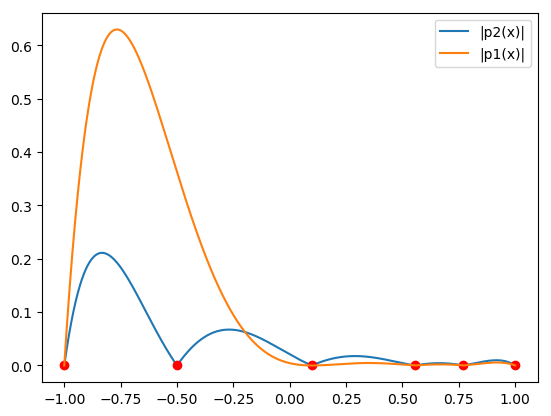

Error=0.21102651030847935


In [17]:
xi2 = zeros(6,1);
for ii=1:n
    xi2[ii] = xi1[ii];
end
xi2[3] = -0.5;
p2 = x.-xi2[1];
for ii=1:n-1
    p2 = p2.*(x.-xi2[ii+1]);
end
println("Error=",maximum(abs.(p2)))
plot(x, abs.(p2),label="|p2(x)|");
plot(xi2, zeros(n,1), "or");
plot(x, abs.(p1),label="|p1(x)|");
plt.legend();

Consider chebychev nodes
$$x_{cheb}[n] := \cos(\frac{n-\frac{1}{2}}{n}\pi)$$ for $n=1,2,\cdots,6$

In [18]:
xi_cheb = cos.(((1:n).-0.5)*pi/n)

6-element Array{Float64,1}:
  0.9659258262890683 
  0.7071067811865476 
  0.25881904510252074
 -0.25881904510252063
 -0.7071067811865475 
 -0.9659258262890682 

Construct $p_{cheb}(x)=(x-x_{cheb}[1])(x-x_{cheb}[2])\cdots(x-x_{cheb}[6])$. Define $Error = \max_{x\in [-1,1]}p_{cheb}(x)$. Plot $p_{cheb}(x)$.

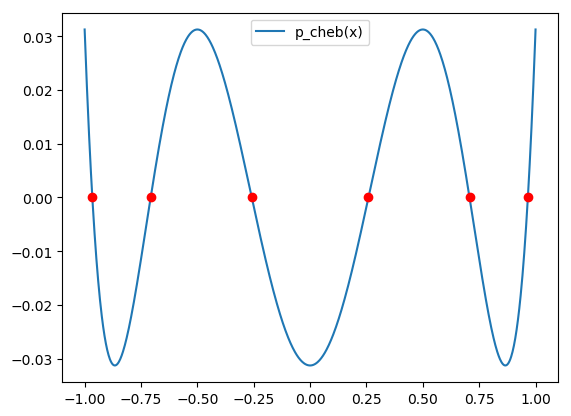

Error=0.03125000000000008


In [19]:
x2 = range(-1,stop=1,length=1000);
p_cheb = x2.-xi_cheb[1];
for ii=1:n-1
    p_cheb = p_cheb.*(x2.-xi_cheb[ii+1]);
end
println("Error=",maximum(abs.(p_cheb)))
plot(x2, (p_cheb),label="p_cheb(x)");
plot(xi_cheb, zeros(n,1), "or");
plt.legend();